# ---------------------------------------------- Filter ----------------------------------------------------

In [10]:
from numpy import sin, arange, pi
from scipy.signal import lfilter,firwin,butter, lfilter, freqz
from scipy import signal
from pylab import figure, plot, grid, show
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import filter_design as fd
%matplotlib notebook

### Task17# FIR Filter Low Pass

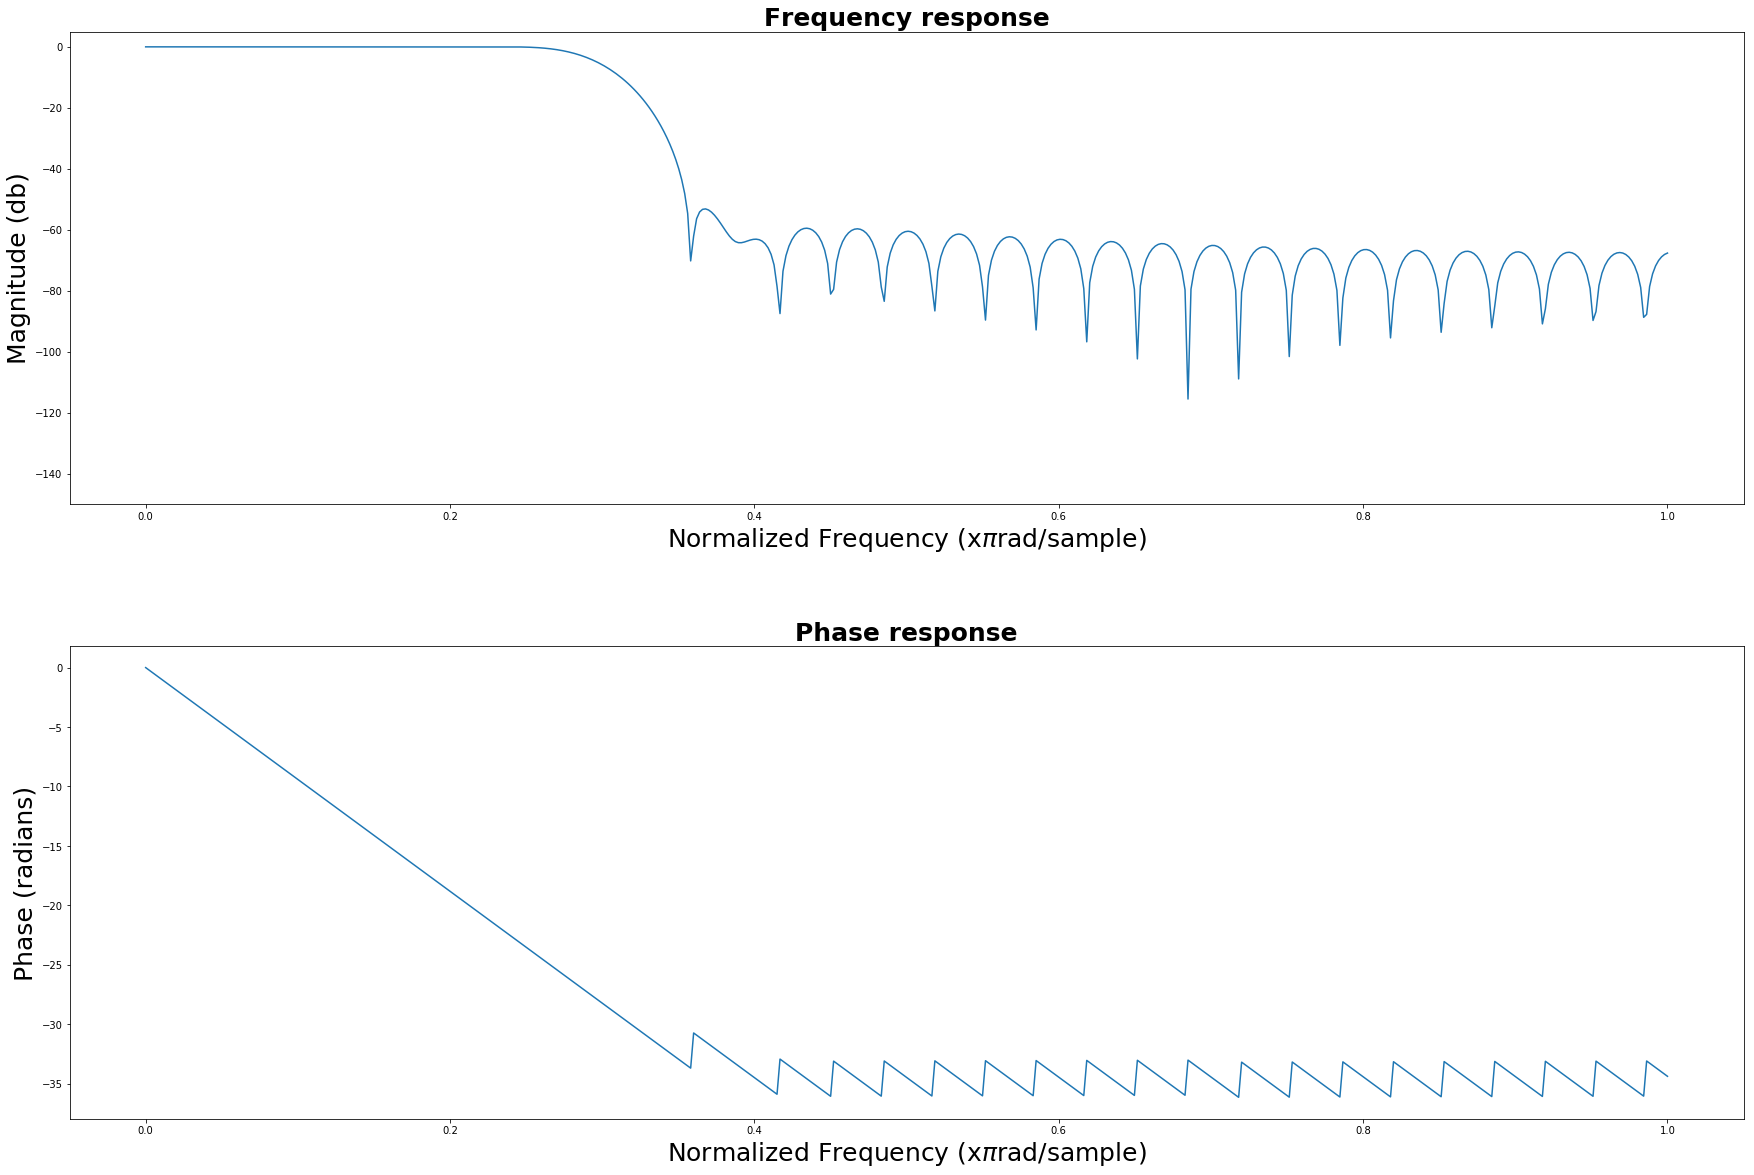

In [4]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    plt.figure(figsize=(30, 20))
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)', fontsize= 25)
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)', fontsize= 25)
    title(r'Frequency response', fontweight="bold", fontsize= 25)
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)', fontsize= 25)
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)', fontsize= 25)
    title(r'Phase response', fontweight="bold", fontsize= 25)
    subplots_adjust(hspace=0.3)

#Plot step and impulse response
def impz(b,a=1):
    plt.figure(figsize=(20,15))
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude', fontsize= 25)
    xlabel(r'n (samples)', fontsize= 25)
    title(r'Impulse response', fontweight="bold", fontsize= 25)
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude', fontsize= 25)
    xlabel(r'n (samples)',fontsize= 25 )
    title(r'Step response', fontweight="bold", fontsize= 25)
    subplots_adjust(hspace=0.3)
n = 61
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)
plt.show()

### Task18# FIR Filter High Pass

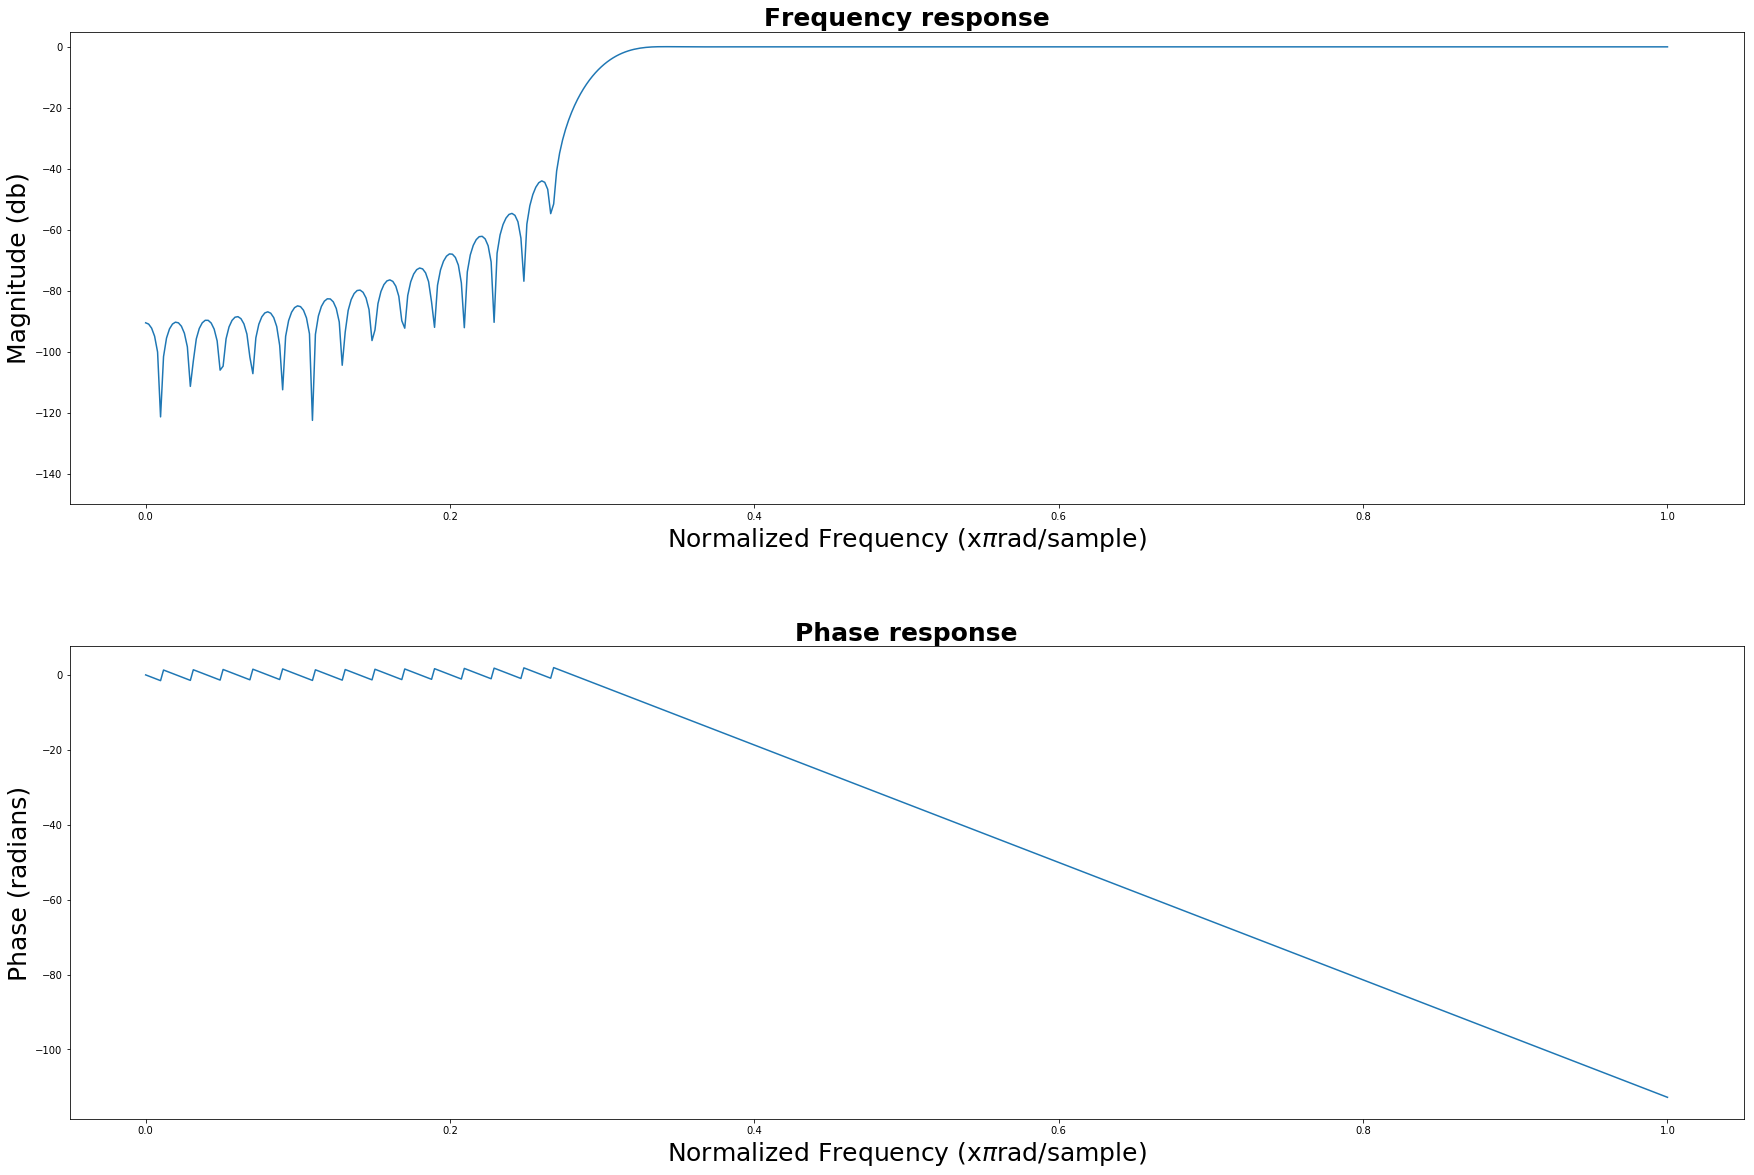

In [5]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
mfreqz(a)
show()

### Task19# FIR Filter Band Pass

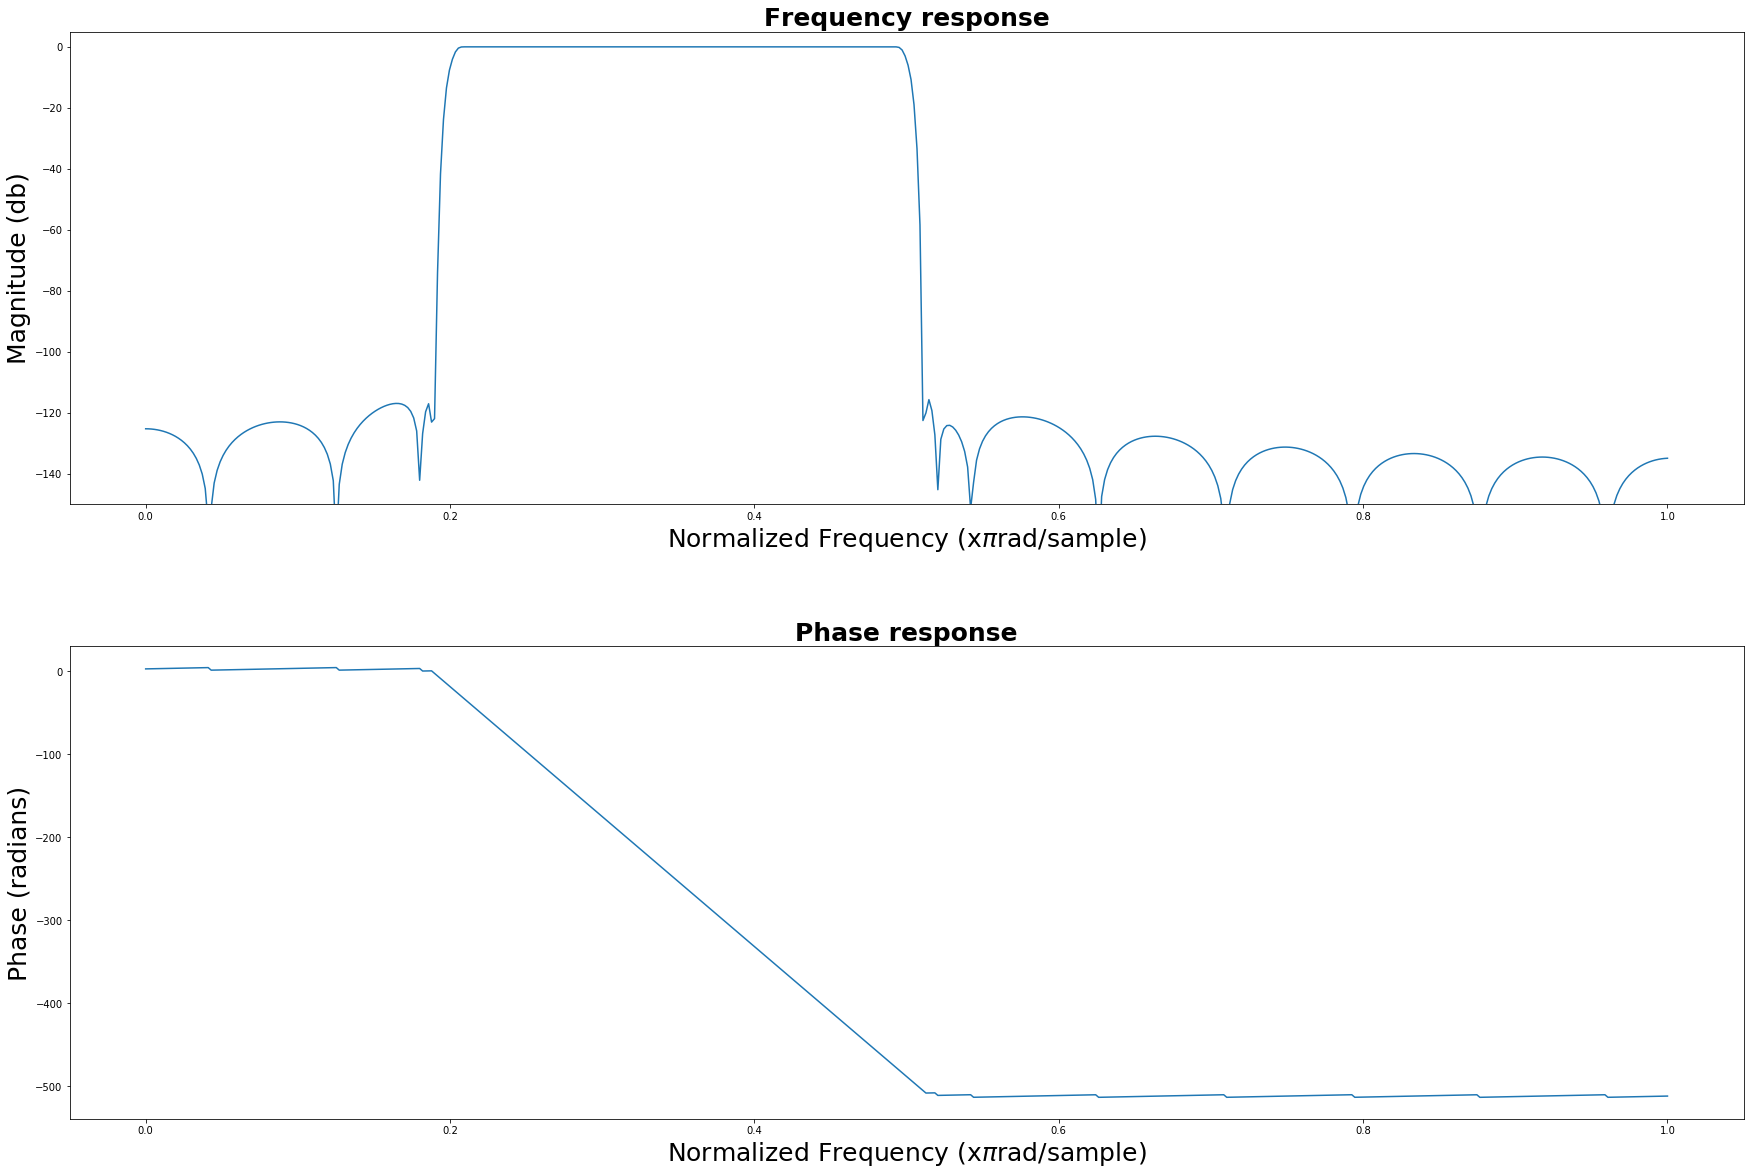

In [8]:
n = 1001
## Band Pass Filter
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'flattop', pass_zero = False)
mfreqz(a)
show()

### Band Reject Filter

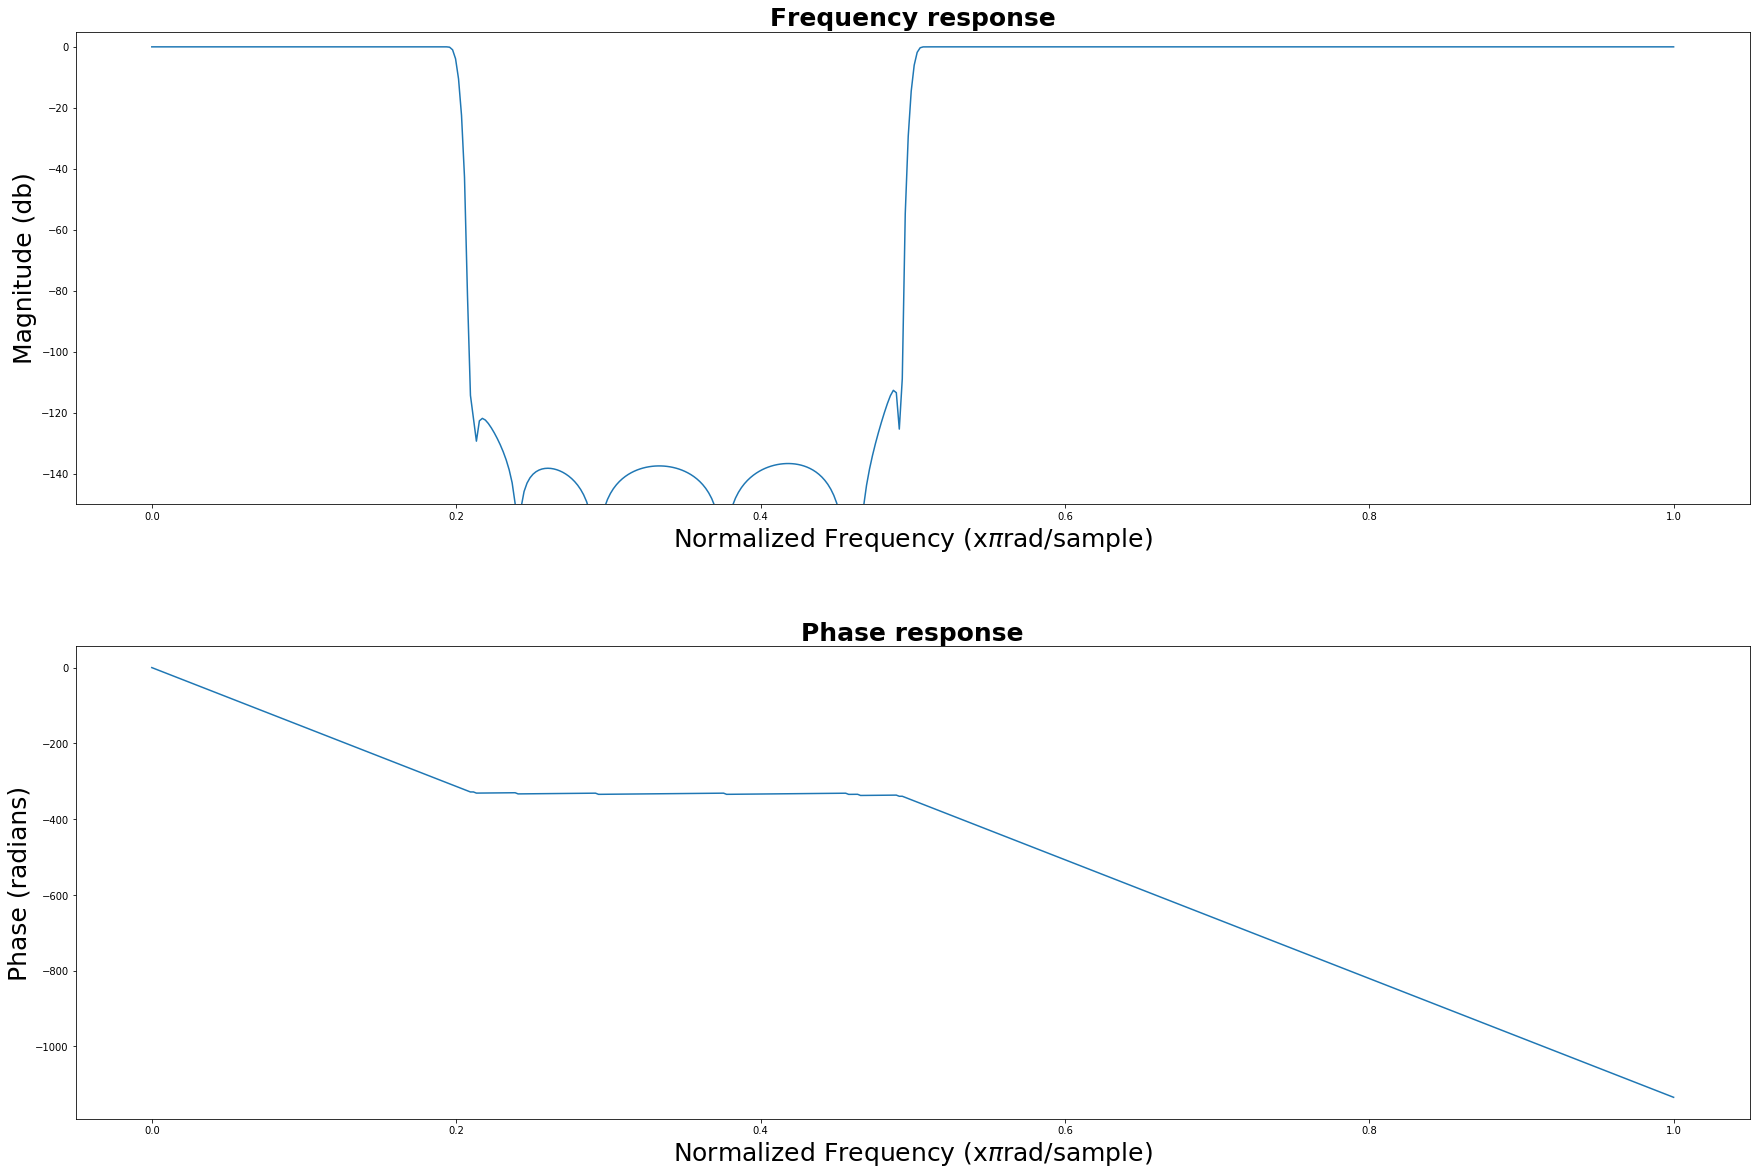

In [7]:
## Band Reject Filter
# bohman
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = True)
mfreqz(a)
show()

### Task20# IIR Filter Low Pass

In [11]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

### Task21# IIR Filter High Pass

In [42]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

<IPython.core.display.Javascript object>


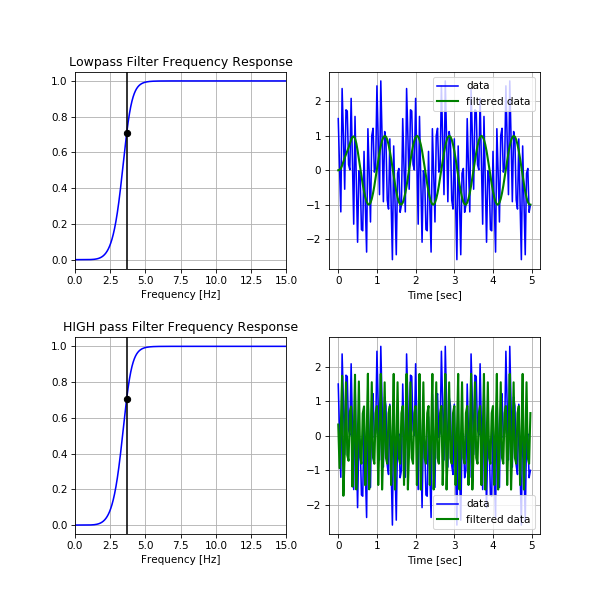

In [43]:
##For Low Pass:
# Plot the frequency response.
plt.figure(figsize=(8,8))

w, h = freqz(b, a, worN=8000)
plt.subplot(2,2,1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
plt.subplot(2,2,2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.show()

##For High Pass:

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 2, 3)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("HIGH pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 2, 4)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()